In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

## import Data
#### import data from raw data that's queried by API

In [3]:
df = pd.read_csv('../data/raw/raw-data.csv')

In [4]:
df

,date,url,headline,articles,doc_type,material_type,section,keywords,label
0,2020-01-01,https://www.nytimes.com/2019/12/31/us/texas-ch...,‘Battling a Demon’: Drifter Sought Help Before...,The gunman who shot two parishioners at the We...,article,News,NaN,"['Churches (Buildings)', 'Murders, Attempted M...",us
1,2020-01-01,https://www.nytimes.com/2019/12/31/opinion/for...,Protect Veterans From Fraud,Congress could do much more to protect America...,article,Editorial,NaN,"['Veterans', 'For-Profit Schools', 'Financial ...",opinion
2,2020-01-01,https://www.nytimes.com/2019/12/31/health/e-ci...,F.D.A. Plans to Ban Most E-Cigarette Flavors b...,The tobacco and vaping industries and conserva...,article,News,NaN,"['E-Cigarettes', 'Recalls and Bans of Products...",health
3,2020-01-01,https://www.nytimes.com/2019/12/31/crosswords/...,‘It’s Green and Slimy’,Christina Iverson and Jeff Chen ring in the Ne...,article,News,NaN,['Crossword Puzzles'],crosswords
4,2020-01-01,https://www.nytimes.com/2019/12/31/pageoneplus...,"Corrections: Jan. 1, 2020",Corrections that appeared in print on Wednesda...,article,Correction,NaN,[],us
...,...,...,...,...,...,...,...,...,...
4475,2020-01-31,https://www.nytimes.com/2020/01/31/sports/bask...,Lakers Fall to Blazers on Emotional Night Hono...,It was the Lakers’ first game since Bryant and...,article,News,NaN,['Basketball'],sports
4476,2020-01-31,https://www.nytimes.com/2020/01/31/sports/olym...,Alberto Salazar Is Suspended by SafeSport Afte...,The famed running coach was already barred fro...,article,News,NaN,"['Running', 'Coaches and Managers']",sports
4477,2020-01-31,https://www.nytimes.com/2020/01/31/health/cpr-...,"CPR, by Default","When very old patients suffer cardiac arrest, ...",article,News,NaN,"['Hospitals', 'Defibrillators', 'Living Wills ...",health
4478,2020-01-31,https://www.nytimes.com/video/us/politics/1000...,Impeachment Trial Highlights: A Showdown Over ...,Senators rejected a call for additional witnes...,multimedia,Video,NaN,"['Impeachment', 'Trump-Ukraine Whistle-blower ...",politics


In [5]:
df.shape

(4480, 9)

## Checking all lebels and it's number

In [6]:
def count_values(dataframe ,a):
    """Counting the total numbers of the specific lebel"""
    
    label = []
    u_names = []
    count = []
    for i in dataframe[a]:
        label.append(i)
    for names in label:
        if names not in u_names:
            names = str(names)
            u_names.append(names)
    for num in u_names:
        count.append(label.count(num))
    return pd.DataFrame({'Label': u_names, 'Numbers': count})

In [7]:
count_values(df ,'label')

,Label,Numbers
0,us,287
1,opinion,503
2,health,49
3,crosswords,43
4,todayspaper,28
5,world,482
6,politics,494
7,science,61
8,arts,346
9,business,297


## Select data

In [8]:
df1 = df[['date','label', 'headline', 'articles', 'url']]

In [9]:
df1

,date,label,headline,articles,url
0,2020-01-01,us,‘Battling a Demon’: Drifter Sought Help Before...,The gunman who shot two parishioners at the We...,https://www.nytimes.com/2019/12/31/us/texas-ch...
1,2020-01-01,opinion,Protect Veterans From Fraud,Congress could do much more to protect America...,https://www.nytimes.com/2019/12/31/opinion/for...
2,2020-01-01,health,F.D.A. Plans to Ban Most E-Cigarette Flavors b...,The tobacco and vaping industries and conserva...,https://www.nytimes.com/2019/12/31/health/e-ci...
3,2020-01-01,crosswords,‘It’s Green and Slimy’,Christina Iverson and Jeff Chen ring in the Ne...,https://www.nytimes.com/2019/12/31/crosswords/...
4,2020-01-01,us,"Corrections: Jan. 1, 2020",Corrections that appeared in print on Wednesda...,https://www.nytimes.com/2019/12/31/pageoneplus...
...,...,...,...,...,...
4475,2020-01-31,sports,Lakers Fall to Blazers on Emotional Night Hono...,It was the Lakers’ first game since Bryant and...,https://www.nytimes.com/2020/01/31/sports/bask...
4476,2020-01-31,sports,Alberto Salazar Is Suspended by SafeSport Afte...,The famed running coach was already barred fro...,https://www.nytimes.com/2020/01/31/sports/olym...
4477,2020-01-31,health,"CPR, by Default","When very old patients suffer cardiac arrest, ...",https://www.nytimes.com/2020/01/31/health/cpr-...
4478,2020-01-31,politics,Impeachment Trial Highlights: A Showdown Over ...,Senators rejected a call for additional witnes...,https://www.nytimes.com/video/us/politics/1000...


#### Select labels => sport, opinion, world, politics, business, arts and return it as a new column

In [10]:
df1 = df1.loc[df['label'].isin(['sports','opinion','world','politics','business','arts'])]

In [11]:
df1

,date,label,headline,articles,url
1,2020-01-01,opinion,Protect Veterans From Fraud,Congress could do much more to protect America...,https://www.nytimes.com/2019/12/31/opinion/for...
6,2020-01-01,world,Hospitals and Schools Are Being Bombed in Syri...,Attacks on civilian sites in Syria have grown ...,https://www.nytimes.com/interactive/2019/12/31...
7,2020-01-01,world,Hong Kong Protesters Return to Streets as New ...,"Weeks of relative calm ended on Wednesday, as ...",https://www.nytimes.com/2020/01/01/world/asia/...
9,2020-01-01,politics,Dizzying Day for Trump Caps a Year Full of Them,The president monitored a Middle East crisis f...,https://www.nytimes.com/2019/12/31/us/politics...
13,2020-01-01,arts,What’s on TV Wednesday: A Linda Ronstadt Doc a...,“Linda Ronstadt: The Sound of My Voice” airs o...,https://www.nytimes.com/2020/01/01/arts/televi...
...,...,...,...,...,...
4473,2020-01-31,business,Richard Plepler and Josh Tyrangiel May Revive ...,The former boss of the premium cable network i...,https://www.nytimes.com/2020/01/31/business/me...
4474,2020-01-31,politics,Trump Hotel Patrons Relish Impeachment Finale,In the lobby of the president’s Washington hot...,https://www.nytimes.com/2020/01/31/us/politics...
4475,2020-01-31,sports,Lakers Fall to Blazers on Emotional Night Hono...,It was the Lakers’ first game since Bryant and...,https://www.nytimes.com/2020/01/31/sports/bask...
4476,2020-01-31,sports,Alberto Salazar Is Suspended by SafeSport Afte...,The famed running coach was already barred fro...,https://www.nytimes.com/2020/01/31/sports/olym...


In [12]:
df1.shape

(2348, 5)

In [13]:
count_values(df1 ,'label')

,Label,Numbers
0,opinion,503
1,world,482
2,politics,494
3,arts,346
4,business,297
5,sports,226


---------------------------------------------------------

In [14]:
df2 = df1.copy(deep=True)

In [15]:
df2['category_id'] = df2['label'].factorize(sort=False)[0]

In [16]:
df2[['label','category_id']].drop_duplicates().sort_values('category_id')

,label,category_id
1,opinion,0
6,world,1
9,politics,2
13,arts,3
15,business,4
49,sports,5


In [17]:
df2 = df2[['date', 'category_id', 'label', 'headline', 'articles', 'url']]

In [18]:
df2

,date,category_id,label,headline,articles,url
1,2020-01-01,0,opinion,Protect Veterans From Fraud,Congress could do much more to protect America...,https://www.nytimes.com/2019/12/31/opinion/for...
6,2020-01-01,1,world,Hospitals and Schools Are Being Bombed in Syri...,Attacks on civilian sites in Syria have grown ...,https://www.nytimes.com/interactive/2019/12/31...
7,2020-01-01,1,world,Hong Kong Protesters Return to Streets as New ...,"Weeks of relative calm ended on Wednesday, as ...",https://www.nytimes.com/2020/01/01/world/asia/...
9,2020-01-01,2,politics,Dizzying Day for Trump Caps a Year Full of Them,The president monitored a Middle East crisis f...,https://www.nytimes.com/2019/12/31/us/politics...
13,2020-01-01,3,arts,What’s on TV Wednesday: A Linda Ronstadt Doc a...,“Linda Ronstadt: The Sound of My Voice” airs o...,https://www.nytimes.com/2020/01/01/arts/televi...
...,...,...,...,...,...,...
4473,2020-01-31,4,business,Richard Plepler and Josh Tyrangiel May Revive ...,The former boss of the premium cable network i...,https://www.nytimes.com/2020/01/31/business/me...
4474,2020-01-31,2,politics,Trump Hotel Patrons Relish Impeachment Finale,In the lobby of the president’s Washington hot...,https://www.nytimes.com/2020/01/31/us/politics...
4475,2020-01-31,5,sports,Lakers Fall to Blazers on Emotional Night Hono...,It was the Lakers’ first game since Bryant and...,https://www.nytimes.com/2020/01/31/sports/bask...
4476,2020-01-31,5,sports,Alberto Salazar Is Suspended by SafeSport Afte...,The famed running coach was already barred fro...,https://www.nytimes.com/2020/01/31/sports/olym...


In [19]:
df2 = df2.rename(index=str, columns = {"label" : "category"}, inplace=False)

In [20]:
df2

,date,category_id,category,headline,articles,url
1,2020-01-01,0,opinion,Protect Veterans From Fraud,Congress could do much more to protect America...,https://www.nytimes.com/2019/12/31/opinion/for...
6,2020-01-01,1,world,Hospitals and Schools Are Being Bombed in Syri...,Attacks on civilian sites in Syria have grown ...,https://www.nytimes.com/interactive/2019/12/31...
7,2020-01-01,1,world,Hong Kong Protesters Return to Streets as New ...,"Weeks of relative calm ended on Wednesday, as ...",https://www.nytimes.com/2020/01/01/world/asia/...
9,2020-01-01,2,politics,Dizzying Day for Trump Caps a Year Full of Them,The president monitored a Middle East crisis f...,https://www.nytimes.com/2019/12/31/us/politics...
13,2020-01-01,3,arts,What’s on TV Wednesday: A Linda Ronstadt Doc a...,“Linda Ronstadt: The Sound of My Voice” airs o...,https://www.nytimes.com/2020/01/01/arts/televi...
...,...,...,...,...,...,...
4473,2020-01-31,4,business,Richard Plepler and Josh Tyrangiel May Revive ...,The former boss of the premium cable network i...,https://www.nytimes.com/2020/01/31/business/me...
4474,2020-01-31,2,politics,Trump Hotel Patrons Relish Impeachment Finale,In the lobby of the president’s Washington hot...,https://www.nytimes.com/2020/01/31/us/politics...
4475,2020-01-31,5,sports,Lakers Fall to Blazers on Emotional Night Hono...,It was the Lakers’ first game since Bryant and...,https://www.nytimes.com/2020/01/31/sports/bask...
4476,2020-01-31,5,sports,Alberto Salazar Is Suspended by SafeSport Afte...,The famed running coach was already barred fro...,https://www.nytimes.com/2020/01/31/sports/olym...


In [21]:
df2.reset_index(drop=True, inplace=True)

In [22]:
df2

,date,category_id,category,headline,articles,url
0,2020-01-01,0,opinion,Protect Veterans From Fraud,Congress could do much more to protect America...,https://www.nytimes.com/2019/12/31/opinion/for...
1,2020-01-01,1,world,Hospitals and Schools Are Being Bombed in Syri...,Attacks on civilian sites in Syria have grown ...,https://www.nytimes.com/interactive/2019/12/31...
2,2020-01-01,1,world,Hong Kong Protesters Return to Streets as New ...,"Weeks of relative calm ended on Wednesday, as ...",https://www.nytimes.com/2020/01/01/world/asia/...
3,2020-01-01,2,politics,Dizzying Day for Trump Caps a Year Full of Them,The president monitored a Middle East crisis f...,https://www.nytimes.com/2019/12/31/us/politics...
4,2020-01-01,3,arts,What’s on TV Wednesday: A Linda Ronstadt Doc a...,“Linda Ronstadt: The Sound of My Voice” airs o...,https://www.nytimes.com/2020/01/01/arts/televi...
...,...,...,...,...,...,...
2343,2020-01-31,4,business,Richard Plepler and Josh Tyrangiel May Revive ...,The former boss of the premium cable network i...,https://www.nytimes.com/2020/01/31/business/me...
2344,2020-01-31,2,politics,Trump Hotel Patrons Relish Impeachment Finale,In the lobby of the president’s Washington hot...,https://www.nytimes.com/2020/01/31/us/politics...
2345,2020-01-31,5,sports,Lakers Fall to Blazers on Emotional Night Hono...,It was the Lakers’ first game since Bryant and...,https://www.nytimes.com/2020/01/31/sports/bask...
2346,2020-01-31,5,sports,Alberto Salazar Is Suspended by SafeSport Afte...,The famed running coach was already barred fro...,https://www.nytimes.com/2020/01/31/sports/olym...


In [23]:
df2[['category_id', 'category']].drop_duplicates().sort_values('category_id')

,category_id,category
0,0,opinion
1,1,world
3,2,politics
4,3,arts
6,4,business
19,5,sports


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2348 entries, 1 to 4478
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      2348 non-null   object
 1   label     2348 non-null   object
 2   headline  2348 non-null   object
 3   articles  2341 non-null   object
 4   url       2348 non-null   object
dtypes: object(5)
memory usage: 110.1+ KB


## Clear null

In [25]:
class ClearNull:
    """Clear null values if null it will drop the rows out"""
    
    def __init__(self, dataframe, columns):
        self.dataframe = dataframe
        self.columns = columns
        
    def get_data(self):
        return self.dataframe[self.columns]
        
    def isnullchecking(self):
        """Check if the text is null or not if null turn into True"""
        df = self.get_data()
        self.dataframe['check'] = df.isnull()
        return self.dataframe[self.dataframe['check'] == True]
    
    def dropnull(self):
        """Drop the null row"""
        null = self.isnullchecking()
        df = self.dataframe
        index_name = null[null['check'] == True].index
        df.drop(index_name, inplace=True)
        return self.dataframe
    
    def reset_index(self):
        """Reset the index of the row"""
        df = self.dropnull()
        df.reset_index(drop=True, inplace=True)
        return df
    
    def drop_check(self):
        df = self.reset_index()
        df = df.drop(columns='check')
        return df
        
    def output(self):
        return self.drop_check()

In [26]:
dropnull = ClearNull(df2, 'articles')
dropnull = dropnull.output()

In [27]:
def show_drop_null(dropnull):
    dropnull = dropnull
    return dropnull

In [28]:
show_drop_null(dropnull)

,date,category_id,category,headline,articles,url
0,2020-01-01,0,opinion,Protect Veterans From Fraud,Congress could do much more to protect America...,https://www.nytimes.com/2019/12/31/opinion/for...
1,2020-01-01,1,world,Hospitals and Schools Are Being Bombed in Syri...,Attacks on civilian sites in Syria have grown ...,https://www.nytimes.com/interactive/2019/12/31...
2,2020-01-01,1,world,Hong Kong Protesters Return to Streets as New ...,"Weeks of relative calm ended on Wednesday, as ...",https://www.nytimes.com/2020/01/01/world/asia/...
3,2020-01-01,2,politics,Dizzying Day for Trump Caps a Year Full of Them,The president monitored a Middle East crisis f...,https://www.nytimes.com/2019/12/31/us/politics...
4,2020-01-01,3,arts,What’s on TV Wednesday: A Linda Ronstadt Doc a...,“Linda Ronstadt: The Sound of My Voice” airs o...,https://www.nytimes.com/2020/01/01/arts/televi...
...,...,...,...,...,...,...
2336,2020-01-31,4,business,Richard Plepler and Josh Tyrangiel May Revive ...,The former boss of the premium cable network i...,https://www.nytimes.com/2020/01/31/business/me...
2337,2020-01-31,2,politics,Trump Hotel Patrons Relish Impeachment Finale,In the lobby of the president’s Washington hot...,https://www.nytimes.com/2020/01/31/us/politics...
2338,2020-01-31,5,sports,Lakers Fall to Blazers on Emotional Night Hono...,It was the Lakers’ first game since Bryant and...,https://www.nytimes.com/2020/01/31/sports/bask...
2339,2020-01-31,5,sports,Alberto Salazar Is Suspended by SafeSport Afte...,The famed running coach was already barred fro...,https://www.nytimes.com/2020/01/31/sports/olym...


In [29]:
df2 = dropnull.copy(deep=True)

In [30]:
df2['date'] = pd.to_datetime(df2['date'])

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2341 non-null   datetime64[ns]
 1   category_id  2341 non-null   int64         
 2   category     2341 non-null   object        
 3   headline     2341 non-null   object        
 4   articles     2341 non-null   object        
 5   url          2341 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 109.9+ KB


In [32]:
df2

,date,category_id,category,headline,articles,url
0,2020-01-01,0,opinion,Protect Veterans From Fraud,Congress could do much more to protect America...,https://www.nytimes.com/2019/12/31/opinion/for...
1,2020-01-01,1,world,Hospitals and Schools Are Being Bombed in Syri...,Attacks on civilian sites in Syria have grown ...,https://www.nytimes.com/interactive/2019/12/31...
2,2020-01-01,1,world,Hong Kong Protesters Return to Streets as New ...,"Weeks of relative calm ended on Wednesday, as ...",https://www.nytimes.com/2020/01/01/world/asia/...
3,2020-01-01,2,politics,Dizzying Day for Trump Caps a Year Full of Them,The president monitored a Middle East crisis f...,https://www.nytimes.com/2019/12/31/us/politics...
4,2020-01-01,3,arts,What’s on TV Wednesday: A Linda Ronstadt Doc a...,“Linda Ronstadt: The Sound of My Voice” airs o...,https://www.nytimes.com/2020/01/01/arts/televi...
...,...,...,...,...,...,...
2336,2020-01-31,4,business,Richard Plepler and Josh Tyrangiel May Revive ...,The former boss of the premium cable network i...,https://www.nytimes.com/2020/01/31/business/me...
2337,2020-01-31,2,politics,Trump Hotel Patrons Relish Impeachment Finale,In the lobby of the president’s Washington hot...,https://www.nytimes.com/2020/01/31/us/politics...
2338,2020-01-31,5,sports,Lakers Fall to Blazers on Emotional Night Hono...,It was the Lakers’ first game since Bryant and...,https://www.nytimes.com/2020/01/31/sports/bask...
2339,2020-01-31,5,sports,Alberto Salazar Is Suspended by SafeSport Afte...,The famed running coach was already barred fro...,https://www.nytimes.com/2020/01/31/sports/olym...


In [33]:
df3 = df2.copy(deep = True)

-------------------------------------------------------------------------------

## NLP

In [34]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet

In [35]:
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Marwan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Marwan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Marwan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
def lowercase(row):
    """Lowercase the text"""
    return row.lower()

In [37]:
def remove_special_char(row):
    """Remove the special characters from the text and return into string"""
    text =" "
    for i in row:
        if i.isalnum():
            text+=i
        else:
            text+=' '
    return word_tokenize(text)

In [38]:
def stop_word(row):
    """Remove stop words from the text and return into list"""
    stop_words = set(stopwords.words('english'))
    return [x for x in row if x not in stop_words]

In [39]:
def pos_taggin(row):
    """put in nltk pos_tag into the text"""
    return nltk.pos_tag(row)

In [40]:
def words_lemmatize(row):
    """lemmatize the text with pos_tag"""
    lemmatizer = WordNetLemmatizer()  
    return [lemmatizer.lemmatize(x, wordnet.VERB) if i.startswith('V') else lemmatizer.lemmatize(x, wordnet.NOUN) if i.startswith('N') else lemmatizer.lemmatize(x, wordnet.ADJ) if i.startswith('J') else lemmatizer.lemmatize(x, wordnet.ADV) if i.startswith('R') else '' for x,i in row]

In [41]:
def join_words(row):
    """Join the text"""
    return " ".join(x for x in row)

In [42]:
df3['articles'] = df3['articles'].apply(lowercase)
df3['articles'] = df3['articles'].apply(remove_special_char)
df3['articles'] = df3['articles'].apply(stop_word)
df3['articles'] = df3['articles'].apply(pos_taggin)
df3['articles'] = df3['articles'].apply(words_lemmatize)
df3['articles'] = df3['articles'].apply(join_words)

In [43]:
df3

,date,category_id,category,headline,articles,url
0,2020-01-01,0,opinion,Protect Veterans From Fraud,congress much protect american served country...,https://www.nytimes.com/2019/12/31/opinion/for...
1,2020-01-01,1,world,Hospitals and Schools Are Being Bombed in Syri...,attack civilian site syria grown frequent u n ...,https://www.nytimes.com/interactive/2019/12/31...
2,2020-01-01,1,world,Hong Kong Protesters Return to Streets as New ...,week relative calm end wednesday people march ...,https://www.nytimes.com/2020/01/01/world/asia/...
3,2020-01-01,2,politics,Dizzying Day for Trump Caps a Year Full of Them,president monitor middle east crisis golf club...,https://www.nytimes.com/2019/12/31/us/politics...
4,2020-01-01,3,arts,What’s on TV Wednesday: A Linda Ronstadt Doc a...,linda ronstadt sound voice air cnn new season ...,https://www.nytimes.com/2020/01/01/arts/televi...
...,...,...,...,...,...,...
2336,2020-01-31,4,business,Richard Plepler and Josh Tyrangiel May Revive ...,former bos premium cable network talk former v...,https://www.nytimes.com/2020/01/31/business/me...
2337,2020-01-31,2,politics,Trump Hotel Patrons Relish Impeachment Finale,lobby president washington hotel supporter rem...,https://www.nytimes.com/2020/01/31/us/politics...
2338,2020-01-31,5,sports,Lakers Fall to Blazers on Emotional Night Hono...,lakers first game bryant daughter gianna die ...,https://www.nytimes.com/2020/01/31/sports/bask...
2339,2020-01-31,5,sports,Alberto Salazar Is Suspended by SafeSport Afte...,famed run coach already bar sport year dope v...,https://www.nytimes.com/2020/01/31/sports/olym...


In [44]:
df1

,date,label,headline,articles,url
1,2020-01-01,opinion,Protect Veterans From Fraud,Congress could do much more to protect America...,https://www.nytimes.com/2019/12/31/opinion/for...
6,2020-01-01,world,Hospitals and Schools Are Being Bombed in Syri...,Attacks on civilian sites in Syria have grown ...,https://www.nytimes.com/interactive/2019/12/31...
7,2020-01-01,world,Hong Kong Protesters Return to Streets as New ...,"Weeks of relative calm ended on Wednesday, as ...",https://www.nytimes.com/2020/01/01/world/asia/...
9,2020-01-01,politics,Dizzying Day for Trump Caps a Year Full of Them,The president monitored a Middle East crisis f...,https://www.nytimes.com/2019/12/31/us/politics...
13,2020-01-01,arts,What’s on TV Wednesday: A Linda Ronstadt Doc a...,“Linda Ronstadt: The Sound of My Voice” airs o...,https://www.nytimes.com/2020/01/01/arts/televi...
...,...,...,...,...,...
4473,2020-01-31,business,Richard Plepler and Josh Tyrangiel May Revive ...,The former boss of the premium cable network i...,https://www.nytimes.com/2020/01/31/business/me...
4474,2020-01-31,politics,Trump Hotel Patrons Relish Impeachment Finale,In the lobby of the president’s Washington hot...,https://www.nytimes.com/2020/01/31/us/politics...
4475,2020-01-31,sports,Lakers Fall to Blazers on Emotional Night Hono...,It was the Lakers’ first game since Bryant and...,https://www.nytimes.com/2020/01/31/sports/bask...
4476,2020-01-31,sports,Alberto Salazar Is Suspended by SafeSport Afte...,The famed running coach was already barred fro...,https://www.nytimes.com/2020/01/31/sports/olym...


## Word Cloud

In [45]:
from wordcloud import WordCloud

In [46]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white")

In [47]:
opinion = df3.loc[df3['category'] == 'opinion']
business = df3.loc[df3['category'] == 'business']
world = df3.loc[df3['category'] == 'world']
politics = df3.loc[df3['category'] == 'politics']
arts = df3.loc[df3['category'] == 'arts']
sports = df3.loc[df3['category'] == 'sports']

In [48]:
def word_cloud_show(data):
    text = ""
    for i in  data:
        text += i
    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white")
    wordcloud.generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    return plt.show()

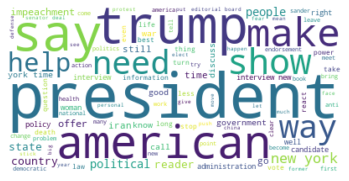

In [49]:
word_cloud_show(opinion.articles)

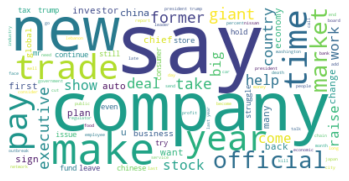

In [50]:
word_cloud_show(business.articles)

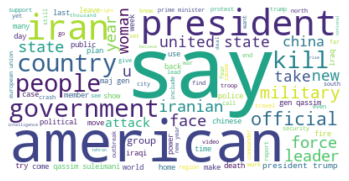

In [51]:
word_cloud_show(world.articles)

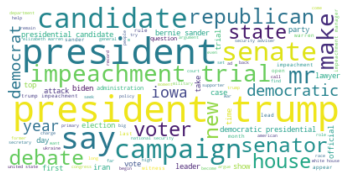

In [52]:
word_cloud_show(politics.articles)

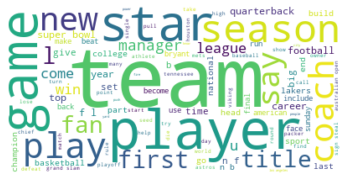

In [53]:
word_cloud_show(sports.articles)